# Data cleaning

Tool for automatic visualization and presentation of the dataset

In [40]:
import pandas as pd
import dtale

df = pd.read_csv('wine.csv')
d = dtale.show(df)
d

ModuleNotFoundError: No module named 'dtale'

## Duplicates

In [41]:
import pandas as pd

df = pd.DataFrame({
    'brand': ['Yum Yum', 'Yum Yum', 'Indomie', 'Indomie', 'Indomie'],
    'style': ['cup', 'cup', 'cup', 'pack', 'pack'],
    'rating': [4, 4, 3.5, 15, 5]
    })
display(df)

mask = df.duplicated()
duplicated_df = df[mask]                # df with duplicates
deduplicated_df = df.drop_duplicates()  # df without duplicates
display(deduplicated_df)

,brand,style,rating
0,Yum Yum,cup,4.0
1,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


,brand,style,rating
0,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


### Non-informative feature

A feature containing more than 95% of unique elements or a feature containing more than 95% of identical elements.

In [42]:
import pandas as pd

df = pd.read_csv('data/wine.csv')

def get_low_info_cols(
   data: pd.DataFrame, thresh: int=95,
   exclude: list=None, verbose: bool=False) -> list:
   """Get the list of columns with non-informative 
   threshold in DataFrame with verbose printing.

   Args:
      data: DataFrame;
      thresh: Threshold of non-information in percent. Defaults to 95;
      exclude: String or list of names of excluded columns. Defaults to None;
      verbose (bool): verbose printing.

   Returns:
      list: List of non-informative columns (features) satisfying a given threshold.
   """
   thresh = thresh / 100
   if exclude is None:
      cols = data.columns
   else:
      cols = list(data.drop(exclude, axis=1).columns)

   low_info_cols = []

   for col in cols:
      unique_ratio = data[col].nunique() / data[col].count()
      top_freq = data[col].value_counts(normalize=True).max()
      if unique_ratio > thresh:
         low_info_cols.append(col)
         if verbose:
            print(f"'{col}' contained {round(unique_ratio, 2)*100}% uniques elements")
      if top_freq > thresh:
         low_info_cols.append(col)
         if verbose:
            print(f"'{col}' contained {round(top_freq, 2)*100}% identical elements")

   return low_info_cols


get_low_info_cols(df, verbose=True)

'description' contained 96.0% uniques elements
'title' contained 96.0% uniques elements


['description', 'title']

### Outliers

Interquartile range (IQR) or Tukey's method

In [43]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/wine.csv')

def get_outliers_iqr(
    data: pd.DataFrame, feature: str,
    left: float=1.5, right: float=1.5,
    log_scale: bool=False, n: int=0) -> tuple:
    """Search outlines by Tukey's method in given features scope

    Args:
        data: Source DataFrame;
        feature: Feature or list of features;
        left: Lower bound of the method. Defaults to 3;
        right: Upper bound of the method. Defaults to 3;
        log_scale: Should feature(s) be in logarithmic view. Defaults to False;
        n: If feature(s) contain values lower than zero. Defaults to 0;

    Returns:
        tuple: Tuple contain DataFrame with all found outliers and cleaned DataFrame
    """
    if log_scale:
        x = np.log(data[feature] + n)
    else:
        x = data[feature]

    qaurtile1 = x.quantile(0.25)
    qaurtile3 = x.quantile(0.75)
    iqr = qaurtile3 - qaurtile1
    lower_bound = qaurtile1 - (left * iqr)
    upper_bound = qaurtile3 + (right * iqr)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]

    return outliers, cleaned


outliers, cleaned = get_outliers_iqr(df, 'price')
outliers, cleaned = get_outliers_iqr(df, 'price')
print(f"Number of outliers in the price feature: {outliers.shape[0]}")

Number of outliers in the price feature: 3625


Z-scores or Sigma level method

In [44]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/wine.csv')

def get_outliers_z_score(
    data: pd.DataFrame, feature: str,
    left: float=3, right: float=3,
    log_scale: bool=False, n: int=0) -> tuple:
    """Search outlines by z-deviations (3-sigma) method in source DataFrame in given features scope

    Args:
        data (pd.DataFrame): Source DataFrame
        feature (str): Feature or list of features
        left (float, optional): Lower bound of the method. Defaults to 3.
        right (float, optional): Upper bound of the method. Defaults to 3.
        log_scale (bool, optional): Should feature(s) be in logarithmic view. Defaults to False.
        n (int, optional): If feature(s) contain values lower than zero. Defaults to 0.

    Returns:
        tuple: Tuple contain DataFrame with all found outliers and cleaned DataFrame
    """
    if log_scale:
        x = np.log(data[feature] + n)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - (left * sigma)
    upper_bound = mu + (right * sigma)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned


outliers, hh_data = get_outliers_z_score(df, 'price', right=4, log_scale=True)
print(f"Number of outliers in the price feature: {outliers.shape[0]}")

Number of outliers in the price feature: 102


### Missing values (NaNs)

Visualization of NaNs via heatmap.

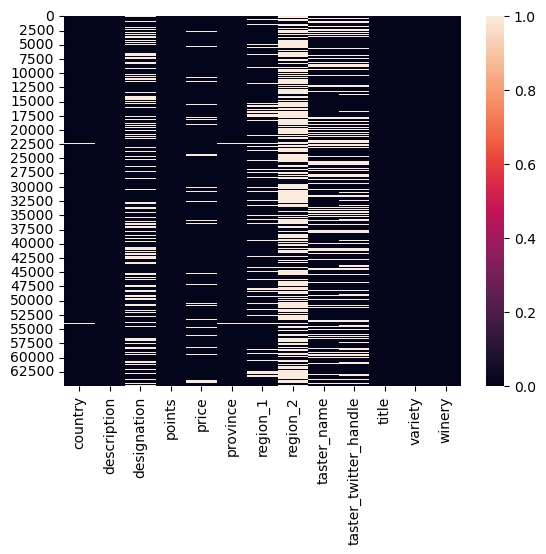

In [45]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('data/wine.csv')

sns.heatmap(df.isnull());

Getting the list of features with NaNs.

In [46]:
import pandas as pd

df = pd.read_csv('data/wine.csv')
df.drop_duplicates()

percent_of_nulls = df.isnull().mean()*100
features_with_nans = percent_of_nulls[percent_of_nulls > 0].sort_values(ascending=False)

print('Features with NaNs and the percentage of it:', features_with_nans, sep='\n')

Features with NaNs and the percentage of it:
region_2                 61.117779
designation              28.573847
taster_twitter_handle    24.154433
taster_name              20.275136
region_1                 16.375835
price                     6.924568
country                   0.052319
province                  0.052319
variety                   0.001539
dtype: float64


Drop features with NaNs of more than 30% and entires with at least one NaN.

In [47]:
df = pd.read_csv('data/wine.csv')
df = df.drop_duplicates()
drop_df = df.copy()

thresh = df.shape[0] * 0.7                      # 100-70 = 30%

drop_df = drop_df.dropna(thresh=thresh, axis=1) # Drop features
drop_df = drop_df.dropna()                      # Drop entries

print(df.shape, drop_df.shape)

(62473, 13) (24999, 12)


Filling NaNs with values. Numerical feature by `mean` _(cause it has lognormal distribution)_. Categorical with a large number of NaNs - _'unknown'_, the rest - `mode`.

In [48]:
values = {
    'designation': 'unknown',
    'taster_twitter_handle': 'unknown',
    'taster_name': 'unknown',
    'region_1': 'unknown',
    'country': df['country'].mode()[0],
    'province': df['province'].mode()[0],
    'variety': df['variety'].mode()[0],
    'price': df['price'].mean()}

df = df.fillna(value=values)